      med_combined_rv_r0
0                  -2.16
1                   0.23
2                 -38.36
3                  10.49
4                  15.46
...                  ...
8172              -10.16
8173              -16.86
8174               18.01
8175               18.01
8176              -20.00

[8152 rows x 1 columns]


/home/sralus/.conda/envs/astrostatistics/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/tmp/ipykernel_33652/2273444121.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v=float(v)


std: med_combined_rv_r0    33.900406
dtype: float64
sstd: med_combined_rv_r0    5.822406
dtype: float64
mean: -8.12764229636899
      med_combined_rv_r0
0                  -2.16
1                   0.23
2                 -38.36
3                  10.49
4                  15.46
...                  ...
8172              -10.16
8173              -16.86
8174               18.01
8175               18.01
8176              -20.00

[8108 rows x 1 columns]
3.7777777777777777 1111.111111111111
sigma2最大概率： 0.027773163305024176
sigma2最大概率值 (array([9148]),)
4057.777777777778 3713311.967685188


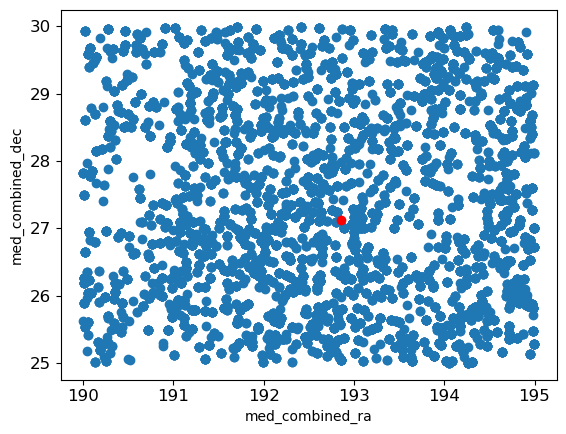

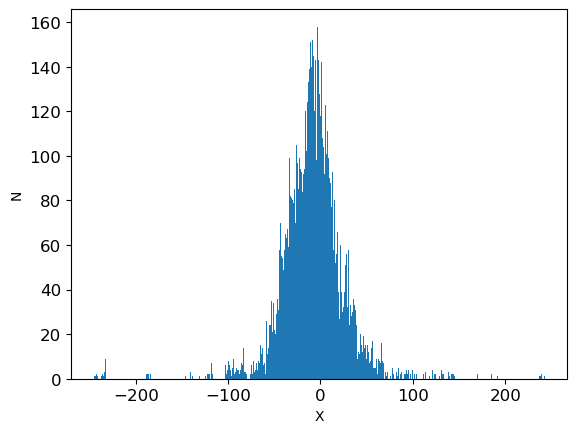

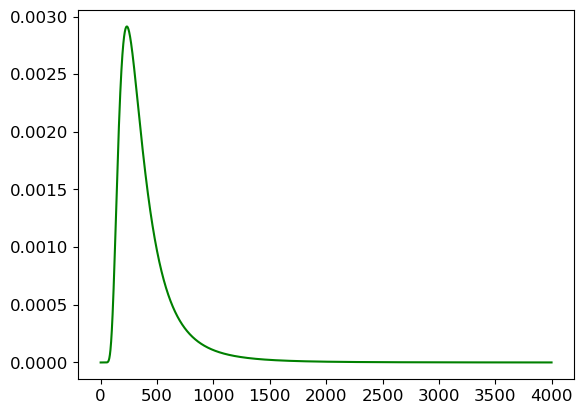

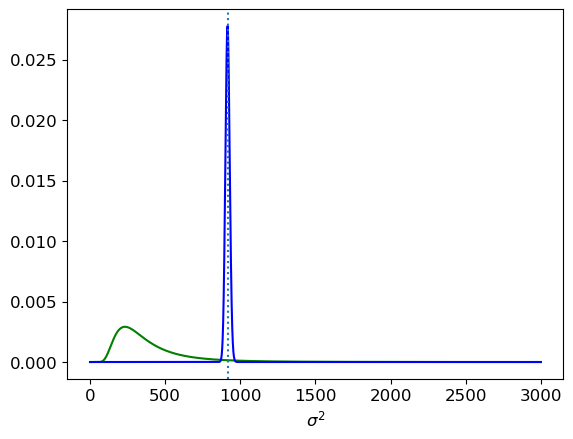

In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick',labelsize=12)
matplotlib.rc('ytick',labelsize=12)
rv = pd.read_csv("./25877.csv", sep="|")
plt.figure()
plt.scatter(rv.loc[:,['med_combined_ra']],rv.loc[:,['med_combined_dec']])
plt.scatter(192.85948,27.12825,c = 'red')
plt.xlabel("med_combined_ra")
plt.ylabel("med_combined_dec")
plt.savefig('3_0.png',format='png',dpi=300)



rv = rv.loc[:, ["med_combined_rv_r0"]]


# 数据预处理
rv.dropna(how='any', subset=["med_combined_rv_r0"], inplace=True)
for x in rv.index:
  if rv.loc[x, "med_combined_rv_r0"] > 300 or rv.loc[x, "med_combined_rv_r0"] <-300:
    rv.drop(x, inplace = True)
print(rv)

# 数据挖掘
plt.figure()
pp = plt.hist(rv, bins=500)
plt.savefig('3_1.png',format='png',dpi=300)
plt.xlabel("X")
plt.ylabel("N")

# 计算方差与期望
rv_var = np.std(rv)
rv_mean = float(np.mean(rv))


print("std:", rv_var)
print("sstd:", rv_var**(0.5))
print("mean:", rv_mean)

# 一次处理
for x in rv.index:
  if (float(rv.loc[x, "med_combined_rv_r0"]) - rv_mean)> 150 or (float(rv.loc[x, "med_combined_rv_r0"]) - rv_mean) < -150:
    rv.drop(x, inplace = True)
print(rv)


import scipy.stats as stats
import scipy.special as special
sig_mean=20**2
sig_var=(sig_mean-(20-10)**2)**2
a1=float(sig_mean**2/sig_var+2)
b1=float(sig_mean*(a1-1))
print(a1,b1)

#定义逆伽马分布密度函数
def InvGamma_pdf(x,a,b):
     if x.any()<0 or a<=0 or b<=0:
        return np.NaN
     else:
        return np.exp(np.log(b)*a-special.gammaln(a)-\
                     (a+1.)*np.log(x)-b/x)

#画出先验分布
x = np.arange(0.1, 4000, 1)
fig = plt.figure()
plt.plot(x, InvGamma_pdf(x,a1,b1),'g-')
plt.savefig('3_2.png',format='png',dpi=300)

n=len(rv)
rv1=np.array(rv)
i=0
v=0
while i<n:
    v=(rv1[i]-rv_mean)**2+v
    i+=1
v=float(v)
a2=a1+n/2
b2=b1+v/2
x = np.arange(0.1, 3000, 0.1)
fig = plt.figure()

#e2,=ax.plot(x, invgamma.pdf(x,k/2.,k/2.*s**2),'g-')
plt.plot(x, InvGamma_pdf(x,a1,b1),'g-')

plt.plot(x, InvGamma_pdf(x,a2,b2),'b-')
plt.axvline(914.8,ls=':')
plt.xlabel(r'$\sigma^2$',fontsize=12)
plt.savefig('3_3.png',format='png',dpi=300)

print('sigma2最大概率：',max(InvGamma_pdf(x,a2,b2)))
print('sigma2最大概率值',np.where(InvGamma_pdf(x,a2,b2)==max(InvGamma_pdf(x,a2,b2))))
print(a2,b2)
plt.show()